In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [12]:
venture_deals = pd.read_csv('Largest US Venture Funding Deals Of 2023.csv').reset_index()
venture_deals

,index,Company,Amount,Lead investors,Valuation,Industry,Date reported
0,0,OpenAI,"$10,000,000,000",Microsoft,NaN,Artificial intelligence,1/23/23
1,1,Stripe,"$6,500,000,000",NaN,"$50,000,000,000",Fintech,3/15/23
2,2,Inflection AI,"$1,300,000,000","Microsoft, Reid Hoffman, Bill Gates, Eric Schm...","$4,000,000,000",Artificial intelligence,6/29/23
3,3,Anthropic,"$1,250,000,000",Amazon,"$4,000,000,000",Artificial intelligence,9/25/23
4,4,Generate Capital,"$1,030,900,000",NaN,NaN,Energy,1/6/23
...,...,...,...,...,...,...,...
166,166,Inceptive,"$100,000,000","NVentures, Andreessen Horowitz",NaN,Biotech,9/7/23
167,167,Vesper Energy,"$100,000,000",GCM Grosvenor,NaN,Energy,9/13/23
168,168,Writer,"$100,000,000",Iconiq Growth,"$500,000,000",Artificial intelligence,9/18/23
169,169,Pryon,"$100,000,000",US Innovative Technology Fund,"$625,000,000",Artificial intelligence,9/19/23


In [5]:
venture_deals.dtypes

Company           object
Amount            object
Lead investors    object
Valuation         object
Industry          object
Date reported     object
dtype: object

### This dataset looks at the top 171 startup funding deals last year (2023)

In [27]:
industry_pivot = venture_deals.groupby('Industry').index.count()
industry_pivot = industry_pivot.sort_values(ascending=False).reset_index()
industry_pivot.head()

,Industry,index
0,Biotech,42
1,Artificial intelligence,21
2,Health care,11
3,Cybersecurity,8
4,Cleantech,7


In [30]:
#I want to see what the top 5 industries to get funding are
count = [count for count in industry_pivot['index'][:5]]
count

[42, 21, 11, 8, 7]

In [33]:
industry= [industry for industry in industry_pivot['Industry'][:5]]
industry

['Biotech',
 'Artificial intelligence',
 'Health care',
 'Cybersecurity',
 'Cleantech']

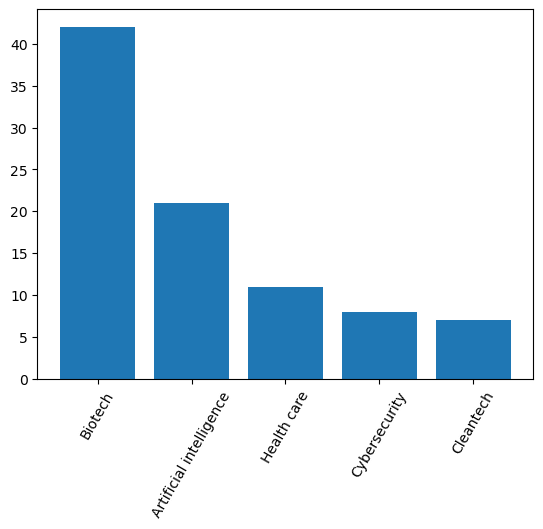

In [38]:
plt.bar(industry, count)
plt.xticks(rotation=60)  # Use plt.xticks to set the rotation angle
plt.show()

In [46]:
venture_deals['Amount'] = pd.to_numeric(venture_deals['Amount'].astype(str).str.replace(',', '').str.replace('$', ''), errors='coerce')
venture_deals['Amount_in_billions'] = venture_deals['Amount'] / 1e9
venture_deals.head() 

,index,Company,Amount,Lead investors,Valuation,Industry,Date reported,Valuation_in_billions,Amount_in_billions
0,0,OpenAI,10000000000,Microsoft,NaN,Artificial intelligence,1/23/23,NaN,10.0000
1,1,Stripe,6500000000,NaN,5.000000e+10,Fintech,3/15/23,50.0,6.5000
2,2,Inflection AI,1300000000,"Microsoft, Reid Hoffman, Bill Gates, Eric Schm...",4.000000e+09,Artificial intelligence,6/29/23,4.0,1.3000
3,3,Anthropic,1250000000,Amazon,4.000000e+09,Artificial intelligence,9/25/23,4.0,1.2500
4,4,Generate Capital,1030900000,NaN,NaN,Energy,1/6/23,NaN,1.0309


Weird a company names Generate Capital ended up in the data. hmm

In [58]:
Biotech_deals = venture_deals[venture_deals['Industry'] == 'Biotech'].reset_index()
Biotech_deals

,level_0,index,Company,Amount,Lead investors,Valuation,Industry,Date reported,Valuation_in_billions,Amount_in_billions
0,15,15,ElevateBio,401000000,AyurMaya Capital Management Fund,NaN,Biotech,5/24/23,NaN,0.4010
1,27,27,ReNAgade Therapeutic,300000000,"MPM BioImpact, F2 Ventures",NaN,Biotech,5/23/23,NaN,0.3000
2,34,34,Generate Biomedicines,273000000,NaN,NaN,Biotech,9/14/23,NaN,0.2730
3,36,36,Orbital Therapeutics,270000000,Arch Venture Partners,NaN,Biotech,4/26/23,NaN,0.2700
4,39,39,Cellares,255000000,Koch Disruptive Technologies,NaN,Biotech,8/23/23,NaN,0.2550
5,46,46,Heartflow,215000000,Bain Capital Life Sciences,NaN,Biotech,4/6/23,NaN,0.2150
6,47,47,Nimbus Therapeutics,210000000,"GV, SR One, Atlas Venture",NaN,Biotech,9/6/23,NaN,0.2100
7,50,50,CARGO Therapeutics,200000000,"Third Rock Ventures, RTW Investments, Percepti...",NaN,Biotech,3/1/23,NaN,0.2000
8,55,55,Upstream Bio,200000000,"Enavate Sciences, Venrock Healthcare Capital P...",NaN,Biotech,6/8/23,NaN,0.2000
9,56,56,ADARx Pharmaceuticals,200000000,"Bain Capital Life Sciences, TCGX",NaN,Biotech,8/9/23,NaN,0.2000


In [56]:
total_bio = len(Biotech_deals)
sum_total_bio = Biotech_deals['Amount_in_billions'].sum().round(2)
print(f"The total funding for the {total_bio} Biotech companies was about ${sum_total_bio} billion.")

The total funding for the 42 Biotech companies was about $6.72 billion.


In [53]:
ai_deals = venture_deals[venture_deals['Industry'] == 'Artificial intelligence']
ai_deals

,index,Company,Amount,Lead investors,Valuation,Industry,Date reported,Valuation_in_billions,Amount_in_billions
0,0,OpenAI,10000000000,Microsoft,NaN,Artificial intelligence,1/23/23,NaN,10.000
2,2,Inflection AI,1300000000,"Microsoft, Reid Hoffman, Bill Gates, Eric Schm...",4.000000e+09,Artificial intelligence,6/29/23,4.000,1.300
3,3,Anthropic,1250000000,Amazon,4.000000e+09,Artificial intelligence,9/25/23,4.000,1.250
13,13,Anthropic,450000000,Spark Capital,4.100000e+09,Artificial intelligence,5/23/23,4.100,0.450
19,19,Adept AI,350000000,"General Catalyst, Spark Capital",1.000000e+09,Artificial intelligence,3/14/23,1.000,0.350
24,24,Anthropic,300000000,Google,NaN,Artificial intelligence,2/3/23,NaN,0.300
26,26,OpenAI,300000000,NaN,2.800000e+09,Artificial intelligence,4/28/23,2.800,0.300
42,42,Hugging Face,235000000,Salesforce Ventures,4.500000e+09,Artificial intelligence,8/23/23,4.500,0.235
58,58,Imbue,200000000,NaN,1.000000e+09,Artificial intelligence,9/7/23,1.000,0.200
76,76,Character.AI,150000000,Andreessen Horowitz,1.000000e+09,Artificial intelligence,3/21/23,1.000,0.150


In [55]:
total_ai = len(ai_deals)
sum_total_ai = ai_deals['Amount_in_billions'].sum().round(2)
print(f"The total funding for the {total_ai} Artificial Intelligence companies was about ${sum_total_ai} billion.")

The total funding for the 21 Artificial Intelligence companies was about $15.78 billion.


Open AI and Anthropic both appear more than once on this list because they raised multiple mega rounds last year